In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
ML_MODEL = False

uni_variate_path = "./tstrans_models/"
multi_variate_path = "./m_tstrans_models/"

In [4]:
def plot_line_plot(y_hat, y_test, model_name, dataset_name, ax):
    
    if ML_MODEL:
        model_name += " Regression"
        
    if model_name == "BiDirectional LSTM":
        model_name = "Bi-Directional LSTM"
    
    if model_name == "LSTM AutoEncoder":
        model_name = "LSTM Auto-Encoder"
    
    df = pd.DataFrame({"Actual": y_test, "PolTrans": y_hat})
    df.plot(ax=ax)
    
    if dataset_name == 'beijing_pm25': dataset_name = "Beijing PM2.5"
    elif dataset_name == 'beijing_pm10': dataset_name = "Beijing PM10"
    else: dataset_name = dataset_name.capitalize()
        
    city = dataset_name    
        
    ax.set_xlabel('Timesteps')
    ax.set_ylabel('Values')
    ax.set_title(f'{city}\n{model_name}')
    ax.grid(ls="--")   

In [5]:
def get_timeseries_plots(dataset_name, ds_dir, ax):
    
    model_directories = glob(f"{ds_dir}" + "*/")
    station_names = [file.split("/")[-1].split("_")[0] for file in glob(f"{ds_dir}*.pkl")]
    
    for model_idx in range(len(model_directories)):

        y_test = np.array([])
        y_hat = np.array([])

        for station_idx in range(len(station_names)):
            try:
                pkl_file = model_directories[model_idx] + station_names[station_idx] + "_pm25.pkl"
                pkl_obj = pickle.load(open(pkl_file, "rb"))
            except FileNotFoundError:
                pkl_file = model_directories[model_idx] + station_names[station_idx] + ".pkl"
                pkl_obj = pickle.load(open(pkl_file, "rb"))            
            

            y_test = np.append(y_test, pkl_obj["test_set"].reshape(-1, 1))
            y_hat = np.append(y_hat, pkl_obj["test_set_predictions"].reshape(-1, 1))            
            
            return plot_line_plot(y_hat, y_test, 
                                      model_directories[model_idx].split("/")[-2], 
                                      dataset_name, ax)

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

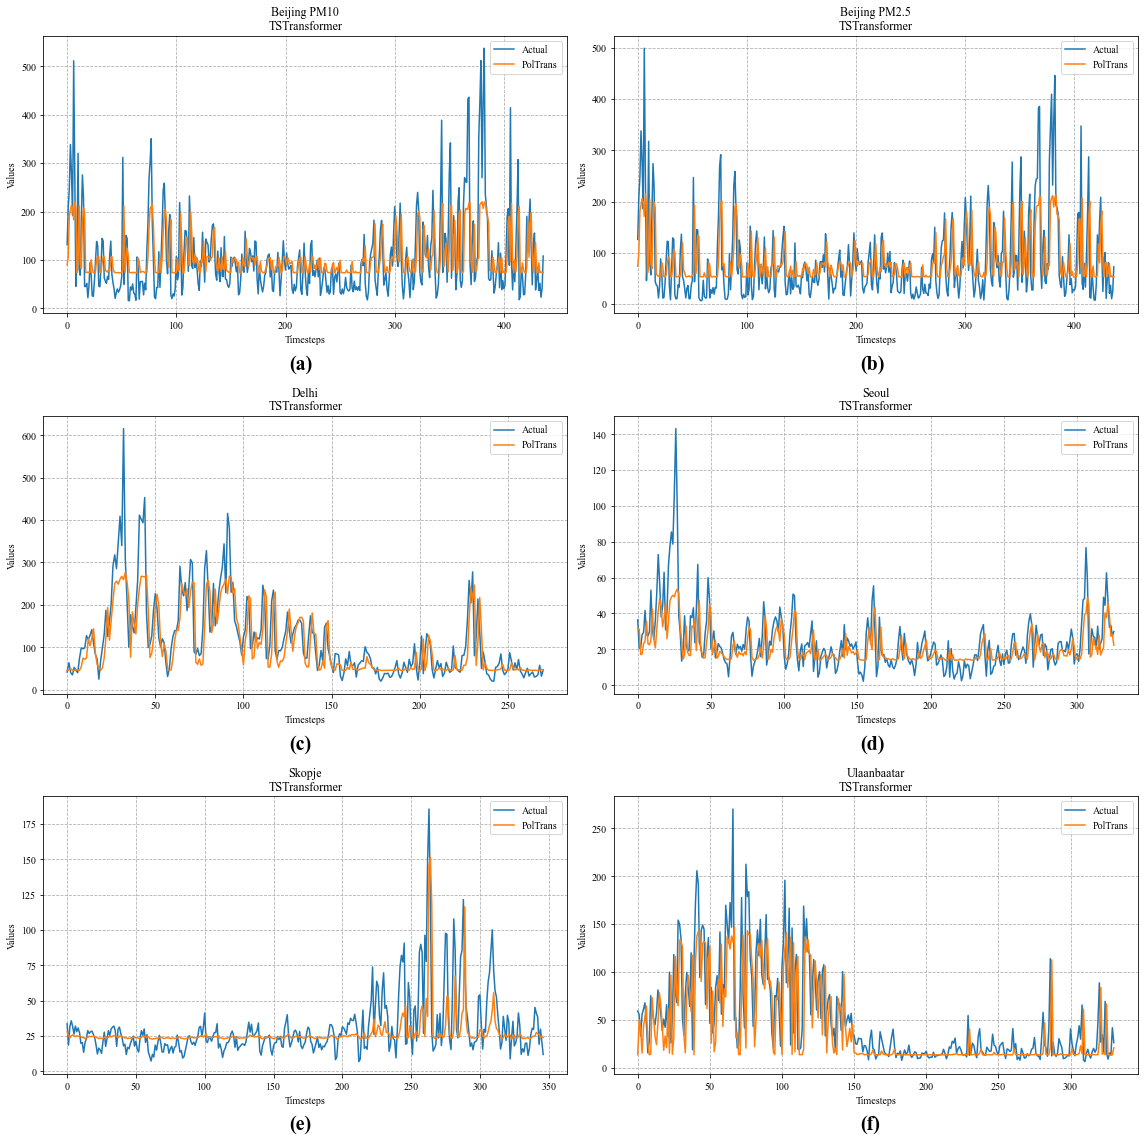

In [7]:
import string
dataset_directories = glob(uni_variate_path + f"/*/") + glob(multi_variate_path + f"/*/")
dataset_directories.sort()
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8*2, 16))

for idx, ds_dir in enumerate(dataset_directories):
    dataset_name = ds_dir.split("/")[-2]
    get_timeseries_plots(dataset_name, ds_dir, axs[idx//2][idx%2])
    axs[idx//2][idx%2].text(0.47, -0.2, f"({string.ascii_lowercase[idx]})", 
                       transform=axs[idx//2][idx%2].transAxes, 
                       size=20, weight='bold')
    
plt.subplots_adjust(hspace=0)
# plt.suptitle('Time-Series Data', y=1.02, fontsize=20)
plt.tight_layout()
plt.savefig(f"./paper_figures/ts-lineplot.png", dpi=400, bbox_inches='tight')